In [15]:
import numpy as np
import pandas as pd
import datetime as dt

import CAPM_fn as capm
import importlib
importlib.reload(capm)

import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [16]:
### ROLLING BETA CALCULATION
N = 50
end = dt.datetime.now()
start = end - dt.timedelta(weeks=52*N)
interval='1d'
frequency = {'1d':252, '1wk':52, '1mo': 12}
frequency = frequency[interval]

tickers = ['AAPL','MSFT','AMZN','TSLA','GOOGL',
           'GOOG','BRK-B','UNH','JNJ','XOM',
           'JPM','META','V','PG','NVDA',
           'HD','CVX','LLY','MA','ABBV',
           'PFE','MRK','PEP','BAC','KO']

stock_df = capm.get_data_yf(tickers, start, end, interval, OHLC='Adj Close', market=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

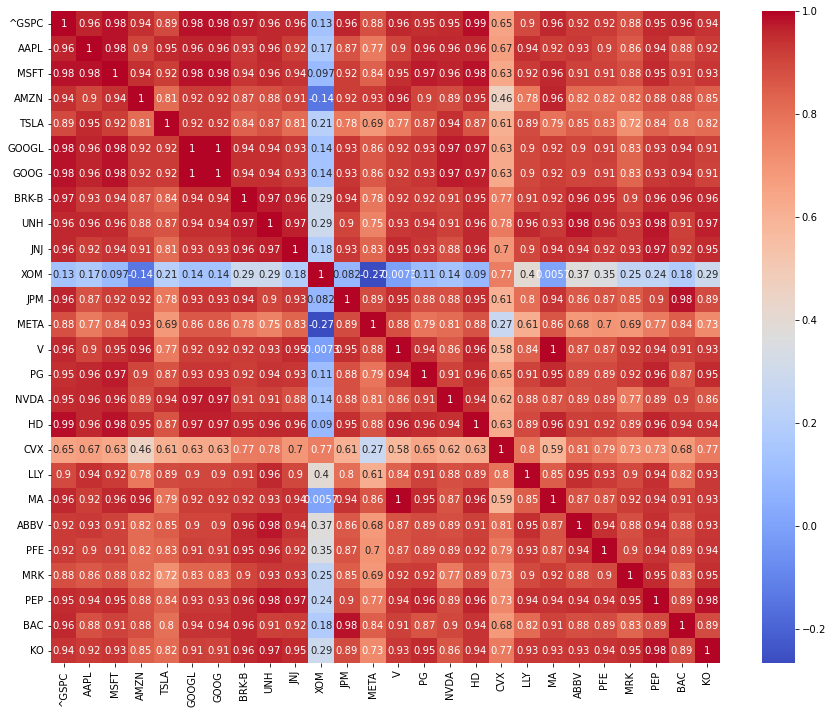

In [17]:
corr = stock_df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap='coolwarm', annot=True);

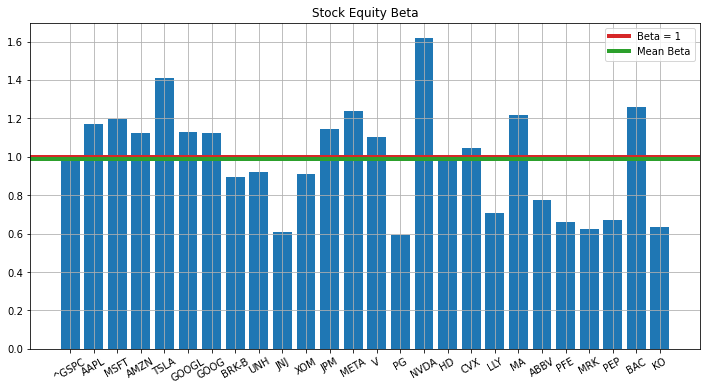

In [18]:
stock_returns = capm.simp_ret(stock_df)
Betas = capm.get_beta_yf(stock_returns)

fig = plt.figure(figsize=(12,6))
ax = plt.axes()
plt.bar(Betas['ticker'], Betas['Beta'])
plt.axhline(1, color='tab:red', linewidth=4, label='Beta = 1')
plt.axhline(Betas['Beta'].mean(), color='tab:green', linewidth=4, label='Mean Beta')

plt.title('Stock Equity Beta')
plt.grid()
plt.legend()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='center');

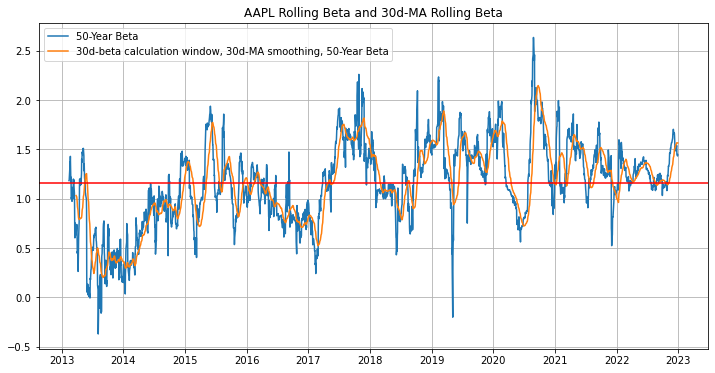

In [19]:
beta_window = 30 #frequency
ma_window = 30 #frequency * 2
ticker = 'AAPL'
Beta, Beta_ma = capm.rolling_beta_yf(stock_df, ticker, beta_window, ma_window)

fig = plt.figure(figsize=(12,6))
plt.plot(Beta, label=f'{N}-Year Beta')
plt.plot(Beta_ma, label=f'{beta_window}{interval[1]}-beta calculation window, \
{ma_window}{interval[1]}-MA smoothing, {N}-Year Beta')

plt.axhline(Beta.mean().values, color='red')
plt.title(f'{ticker} Rolling Beta and {ma_window}{interval[1]}-MA Rolling Beta')
plt.grid()
plt.legend();

In [20]:
# Create empty df for beta of multiple stocks
Beta_df = pd.DataFrame(columns = [])
Beta_ma_df = pd.DataFrame(columns = [])

beta_window = 30 #frequency
ma_window = 30 #frequency * 2

tickers = ['AAPL','MSFT','AMZN','TSLA','GOOGL',
           'GOOG','BRK-B','UNH','JNJ','XOM',
           'JPM','META','V','PG','NVDA',
           'HD','CVX','LLY','MA','ABBV',
           'PFE','MRK','PEP','BAC','KO']

for ticker in tickers:
    Beta, Beta_ma = capm.rolling_beta_yf(stock_df, ticker, beta_window, ma_window)

    Beta_df[ticker] = Beta
    Beta_ma_df[ticker] = Beta_ma

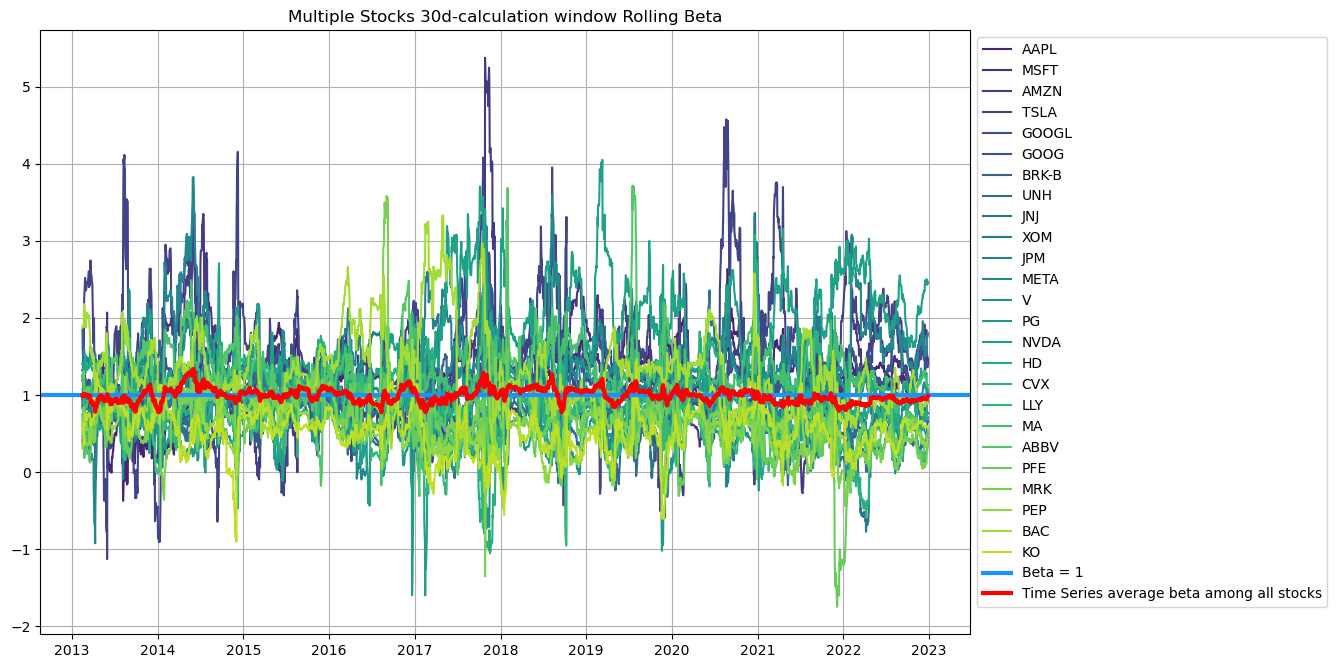

In [21]:
N = len(Beta_df.columns)
custom_cycler = (cycler(color = plt.cm.viridis(np.linspace(0.1,0.9,N))))
fig = plt.figure(figsize=(12,8), dpi=100)
ax = plt.axes()
ax.set_prop_cycle(custom_cycler)

plt.plot(Beta_df, label=Beta_df.columns)
plt.axhline(1, color='dodgerblue', linewidth=3, label='Beta = 1')
plt.plot(Beta_df.mean(axis=1),color='red', linewidth=3, label='Time Series average beta among all stocks')
plt.title(f'Multiple Stocks {beta_window}{interval[1]}-calculation window Rolling Beta')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left");

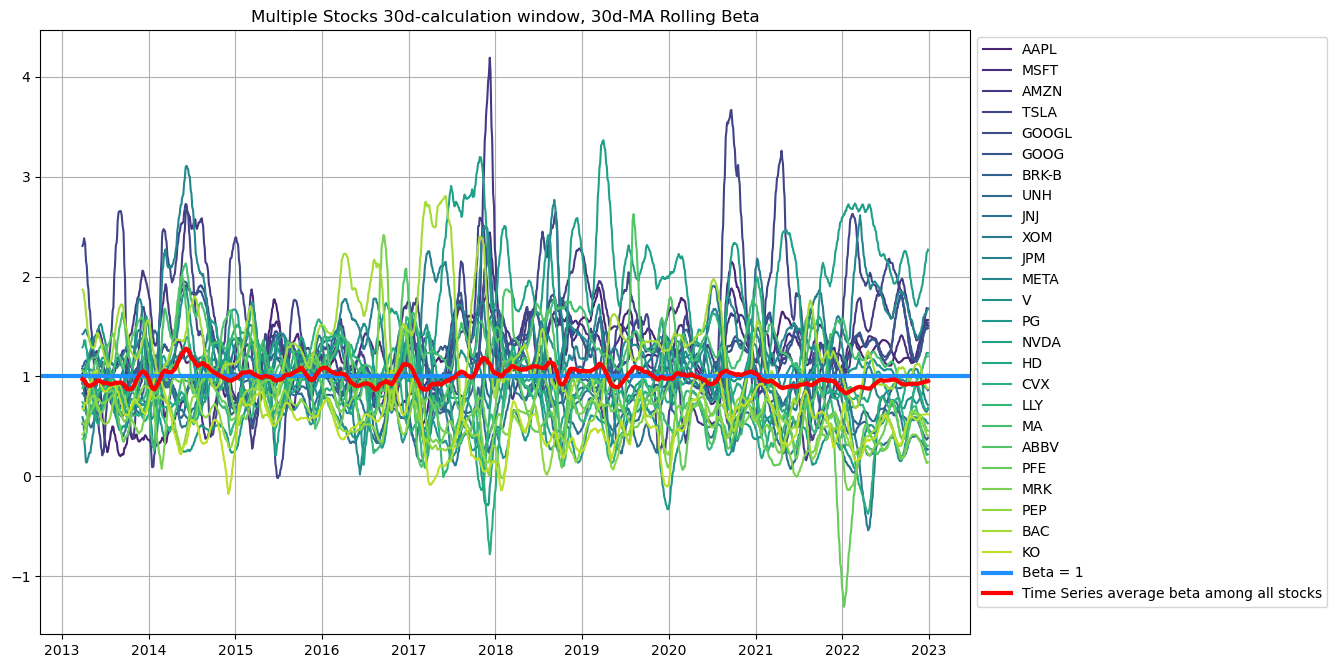

In [22]:
N = len(Beta_ma_df.columns)
custom_cycler = (cycler(color = plt.cm.viridis(np.linspace(0.1,0.9,N))))
fig = plt.figure(figsize=(12,8), dpi=100)
ax = plt.axes()
ax.set_prop_cycle(custom_cycler)

plt.plot(Beta_ma_df, label=Beta_ma_df.columns)
plt.axhline(1, color='dodgerblue', linewidth=3, label='Beta = 1')
plt.plot(Beta_ma_df.mean(axis=1),color='red', linewidth=3, label='Time Series average beta among all stocks')
plt.title(f'Multiple Stocks {beta_window}{interval[1]}-calculation window, {ma_window}{interval[1]}-MA Rolling Beta')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left");